In [1]:
%pylab inline
import numpy as np
import pandas as pd
from utils import scale_by_scale_optim
from utils import scale_fitter_no_grid
from utils import utils
from utils import generate

Populating the interactive namespace from numpy and matplotlib


# Load data

In [ ]:
MY_STOP_LOCATIONS_DATA = '....'

In [2]:
#Read data
stop_df = pd.read_csv(MY_STOP_LOCATIONS_DATA)

#remove non-stationary locations and self-transitions
stop_df = stop_df[stop_df.label!=-1]
stop_df = stop_df[stop_df.label!=stop_df.label.shift()] #Note that this is not necessary
stop_df = stop_df.sort_values(by = 'start').reset_index(drop = True)


#Locations need to start from 0 (reindex)
locs = set(stop_df['label'])
stop_df['label'] = stop_df['label'].map(dict(zip(locs,range(len(locs)))))


#Select the first two years of data for training
training_data = stop_df#[(stop_df['start'] - stop_df['start'].min()<(2*365*60*60*24))]


#Find stops positions
stop_locations = training_data.groupby('label')[['latitude','longitude']].median().sort_index().values
labels = training_data['label'].values.astype(int)

# Fit Parameters (by maximising likelihood)

Searching for minimum at scale 2:

    It: 0/57 | d: 10779.0 km | L: 40576.7 | p: 2: [0.03,0.97,0.00,] ,1: [0.00,1.00,0.00,] ,0: [0.00,1.00,0.00,]  | AIC: 83157.4 | ∆AIC: -1075.9
    It: 1/57 | d: 6210.6 km | L: 38671.4 | p: 2: [0.01,0.99,0.00,] ,1: [0.00,1.00,0.00,] ,0: [0.00,1.00,0.00,]  | AIC: 79348.8 | ∆AIC: -3808.6
    It: 2/57 | d: 3850.7 km | L: 38383.4 | p: 2: [0.01,0.99,0.00,] ,1: [0.00,1.00,0.00,] ,0: [0.00,1.00,0.00,]  | AIC: 78776.7 | ∆AIC: -572.1
    It: 3/57 | d: 2907.2 km | L: 38135.4 | p: 2: [0.02,0.98,0.00,] ,1: [0.00,1.00,0.00,] ,0: [0.00,1.00,0.00,]  | AIC: 78286.7 | ∆AIC: -490.0
    It: 4/57 | d: 2018.1 km | L: 32975.3 | p: 2: [0.01,0.99,0.00,] ,1: [0.01,0.99,0.00,] ,0: [0.01,0.99,0.00,]  | AIC: 67972.6 | ∆AIC: -10314.1
    It: 5/57 | d: 1614.1 km | L: 32907.5 | p: 2: [0.01,0.99,0.00,] ,1: [0.01,0.99,0.00,] ,0: [0.01,0.99,0.00,]  | AIC: 67838.9 | ∆AIC: -133.7
    It: 6/57 | d: 1214.8 km | L: 30420.4 | p: 2: [0.02,0.98,0.00,] ,1: [0.01,0.99,0.00,] ,0: [0.01,0.99,0.00

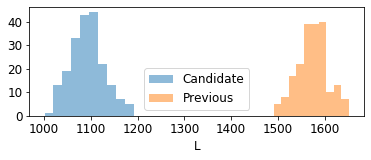

    p = 1.9426434495222354e-119
    --> Rejecting null hypothesis.

Searching for minimum at scale 3:

    It: 0/57 | d: 10779.0 km | L: 28485.5 | p: 3: [0.03,0.10,0.87,0.00,] ,2: [0.00,0.05,0.94,0.00,] ,1: [0.00,0.02,0.98,0.00,] ,0: [0.00,0.01,0.99,0.00,]  | AIC: 59117.1 | ∆AIC: -104.3
    It: 1/57 | d: 6210.6 km | L: 28440.4 | p: 3: [0.01,0.04,0.95,0.00,] ,2: [0.00,0.06,0.94,0.00,] ,1: [0.00,0.01,0.98,0.00,] ,0: [0.00,0.01,0.99,0.00,]  | AIC: 59028.9 | ∆AIC: -88.2
    It: 2/57 | d: 3850.7 km | L: 28415.0 | p: 3: [0.01,0.04,0.95,0.00,] ,2: [0.00,0.06,0.94,0.00,] ,1: [0.00,0.01,0.98,0.00,] ,0: [0.00,0.01,0.99,0.00,]  | AIC: 58982.0 | ∆AIC: -46.9
    It: 3/57 | d: 2907.2 km | L: 28398.0 | p: 3: [0.02,0.04,0.94,0.00,] ,2: [0.00,0.05,0.94,0.00,] ,1: [0.00,0.01,0.98,0.00,] ,0: [0.00,0.01,0.99,0.00,]  | AIC: 58954.0 | ∆AIC: -28.0
    It: 4/57 | d: 2018.1 km | L: 28245.6 | p: 3: [0.01,0.04,0.95,0.00,] ,2: [0.09,0.10,0.82,0.00,] ,1: [0.01,0.01,0.98,0.00,] ,0: [0.01,0.01,0.99,0.00,]  | AIC: 58

    It: 46/57 | d: 249.9 m | L: 28107.8 | p: 3: [0.06,0.69,0.25,0.00,] ,2: [0.02,0.92,0.06,0.00,] ,1: [0.00,0.22,0.78,0.00,] ,0: [0.01,0.88,0.11,0.00,]  | AIC: 59629.5 | ∆AIC: 2140.2
    It: 47/57 | d: 205.9 m | L: 28138.6 | p: 3: [0.06,0.70,0.24,0.00,] ,2: [0.02,0.92,0.06,0.00,] ,1: [0.00,0.22,0.78,0.00,] ,0: [0.01,0.88,0.11,0.00,]  | AIC: 59755.2 | ∆AIC: 2265.8
    It: 48/57 | d: 170.6 m | L: 28166.3 | p: 3: [0.06,0.74,0.21,0.00,] ,2: [0.02,0.93,0.05,0.00,] ,1: [0.00,0.17,0.83,0.00,] ,0: [0.01,0.88,0.11,0.00,]  | AIC: 59898.5 | ∆AIC: 2409.2
    It: 49/57 | d: 141.2 m | L: 28293.1 | p: 3: [0.06,0.75,0.19,0.00,] ,2: [0.02,0.94,0.04,0.00,] ,1: [0.00,0.17,0.83,0.00,] ,0: [0.01,0.88,0.11,0.00,]  | AIC: 60236.3 | ∆AIC: 2747.0
    It: 50/57 | d: 117.4 m | L: 28402.1 | p: 3: [0.06,0.79,0.15,0.00,] ,2: [0.02,0.95,0.04,0.00,] ,1: [0.00,0.17,0.83,0.00,] ,0: [0.01,0.88,0.11,0.00,]  | AIC: 60546.3 | ∆AIC: 3057.0
    It: 51/57 | d: 97.8 m | L: 28452.9 | p: 3: [0.06,0.80,0.15,0.00,] ,2: [0.02,0.96,

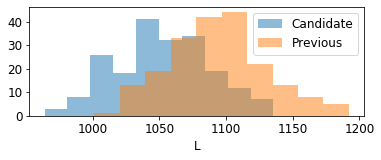

    p = 3.392589244326706e-18
    --> Rejecting null hypothesis.

Searching for minimum at scale 4:

    It: 0/57 | d: 10779.0 km | L: 27375.8 | p: 4: [0.03,0.10,0.23,0.64,0.00,] ,3: [0.00,0.05,0.44,0.51,0.00,] ,2: [0.00,0.02,0.65,0.33,0.00,] ,1: [0.00,0.01,0.51,0.48,0.00,] ,0: [0.00,0.01,0.67,0.32,0.00,]  | AIC: 57369.6 | ∆AIC: -119.7
    It: 1/57 | d: 6210.6 km | L: 27333.4 | p: 4: [0.01,0.04,0.38,0.57,0.00,] ,3: [0.00,0.06,0.44,0.50,0.00,] ,2: [0.00,0.02,0.65,0.33,0.00,] ,1: [0.00,0.01,0.51,0.48,0.00,] ,0: [0.00,0.01,0.67,0.32,0.00,]  | AIC: 57286.8 | ∆AIC: -82.8
    It: 2/57 | d: 3850.7 km | L: 27307.9 | p: 4: [0.01,0.04,0.38,0.57,0.00,] ,3: [0.00,0.06,0.44,0.50,0.00,] ,2: [0.00,0.02,0.65,0.33,0.00,] ,1: [0.00,0.01,0.51,0.48,0.00,] ,0: [0.00,0.01,0.67,0.32,0.00,]  | AIC: 57239.9 | ∆AIC: -46.9
    It: 3/57 | d: 2907.2 km | L: 27285.9 | p: 4: [0.02,0.04,0.35,0.59,0.00,] ,3: [0.00,0.05,0.45,0.50,0.00,] ,2: [0.00,0.02,0.65,0.33,0.00,] ,1: [0.00,0.01,0.51,0.48,0.00,] ,0: [0.00,0.01,0.67

    It: 37/57 | d: 1.4 km | L: 27786.5 | p: 4: [0.06,0.43,0.07,0.44,0.00,] ,3: [0.02,0.65,0.02,0.31,0.00,] ,2: [0.02,0.60,0.27,0.11,0.00,] ,1: [0.00,0.50,0.02,0.47,0.00,] ,0: [0.01,0.67,0.03,0.29,0.00,]  | AIC: 58782.9 | ∆AIC: 1866.4
    It: 38/57 | d: 1.1 km | L: 27761.7 | p: 4: [0.06,0.43,0.11,0.40,0.00,] ,3: [0.02,0.65,0.03,0.31,0.00,] ,2: [0.02,0.60,0.27,0.11,0.00,] ,1: [0.00,0.50,0.02,0.47,0.00,] ,0: [0.01,0.67,0.03,0.29,0.00,]  | AIC: 58777.4 | ∆AIC: 1860.9
    It: 39/57 | d: 932.3 m | L: 28006.8 | p: 4: [0.06,0.43,0.13,0.38,0.00,] ,3: [0.02,0.65,0.18,0.15,0.00,] ,2: [0.02,0.60,0.29,0.10,0.00,] ,1: [0.00,0.50,0.02,0.47,0.00,] ,0: [0.01,0.67,0.03,0.29,0.00,]  | AIC: 59333.6 | ∆AIC: 2417.1
    It: 40/57 | d: 764.9 m | L: 27995.3 | p: 4: [0.06,0.43,0.14,0.37,0.00,] ,3: [0.02,0.65,0.18,0.15,0.00,] ,2: [0.01,0.61,0.30,0.08,0.00,] ,1: [0.00,0.49,0.05,0.45,0.00,] ,0: [0.01,0.67,0.04,0.28,0.00,]  | AIC: 59366.7 | ∆AIC: 2450.2
    It: 41/57 | d: 631.0 m | L: 27965.8 | p: 4: [0.06,0.43,0.1

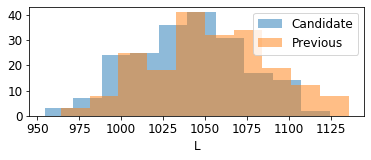

    p = 0.006094418258803505
    --> Rejecting null hypothesis.

Searching for minimum at scale 5:

    It: 0/57 | d: 10779.0 km | L: 27112.0 | p: 5: [0.03,0.01,0.09,0.23,0.64,0.00,] ,4: [0.00,0.01,0.03,0.45,0.51,0.00,] ,3: [0.00,0.09,0.10,0.31,0.51,0.00,] ,2: [0.00,0.01,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.01,0.51,0.48,0.00,] ,0: [0.00,0.01,0.01,0.67,0.32,0.00,]  | AIC: 56868.0 | ∆AIC: -48.5
    It: 1/57 | d: 6210.6 km | L: 27107.9 | p: 5: [0.01,0.00,0.04,0.38,0.57,0.00,] ,4: [0.00,0.01,0.04,0.45,0.50,0.00,] ,3: [0.00,0.09,0.10,0.31,0.51,0.00,] ,2: [0.00,0.01,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.01,0.51,0.48,0.00,] ,0: [0.00,0.01,0.01,0.67,0.32,0.00,]  | AIC: 56861.8 | ∆AIC: -6.2
    It: 2/57 | d: 3850.7 km | L: 27103.5 | p: 5: [0.01,0.00,0.04,0.38,0.57,0.00,] ,4: [0.00,0.01,0.04,0.45,0.50,0.00,] ,3: [0.00,0.09,0.10,0.31,0.51,0.00,] ,2: [0.00,0.01,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.01,0.51,0.48,0.00,] ,0: [0.00,0.01,0.01,0.67,0.32,0.00,]  | AIC: 56857.1 | ∆AIC: -4.7
    It: 3/

    It: 30/57 | d: 5.1 km | L: 27447.3 | p: 5: [0.01,0.04,0.28,0.16,0.51,0.00,] ,4: [0.09,0.10,0.23,0.08,0.51,0.00,] ,3: [0.01,0.01,0.52,0.10,0.36,0.00,] ,2: [0.01,0.00,0.38,0.39,0.22,0.00,] ,1: [0.00,0.01,0.23,0.28,0.48,0.00,] ,0: [0.01,0.01,0.43,0.23,0.32,0.00,]  | AIC: 57872.5 | ∆AIC: 1130.3
    It: 31/57 | d: 4.3 km | L: 27563.1 | p: 5: [0.01,0.04,0.29,0.15,0.51,0.00,] ,4: [0.09,0.10,0.26,0.05,0.51,0.00,] ,3: [0.01,0.01,0.57,0.08,0.34,0.00,] ,2: [0.00,0.00,0.72,0.24,0.04,0.00,] ,1: [0.00,0.01,0.51,0.00,0.48,0.00,] ,0: [0.01,0.01,0.66,0.01,0.32,0.00,]  | AIC: 58124.3 | ∆AIC: 1382.1
    It: 32/57 | d: 3.5 km | L: 27563.6 | p: 5: [0.01,0.04,0.32,0.12,0.51,0.00,] ,4: [0.09,0.10,0.26,0.05,0.51,0.00,] ,3: [0.01,0.01,0.61,0.04,0.34,0.00,] ,2: [0.00,0.00,0.72,0.24,0.04,0.00,] ,1: [0.00,0.01,0.51,0.00,0.48,0.00,] ,0: [0.01,0.01,0.66,0.01,0.32,0.00,]  | AIC: 58163.1 | ∆AIC: 1421.0
    It: 33/57 | d: 2.9 km | L: 27485.3 | p: 5: [0.01,0.04,0.36,0.08,0.51,0.00,] ,4: [0.09,0.10,0.26,0.05,0.51,0.

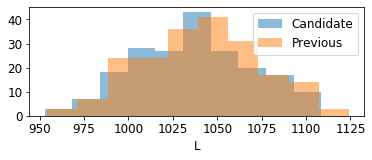

    p = 0.39352743357720954
    --> Rejecting null hypothesis.

Searching for minimum at scale 6:

    It: 0/57 | d: 10779.0 km | L: 26992.7 | p: 6: [0.03,0.01,0.05,0.05,0.23,0.64,0.00,] ,5: [0.00,0.01,0.02,0.01,0.45,0.51,0.00,] ,4: [0.00,0.05,0.05,0.00,0.33,0.57,0.00,] ,3: [0.00,0.34,0.07,0.38,0.10,0.10,0.00,] ,2: [0.00,0.01,0.00,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.00,0.00,0.51,0.48,0.00,] ,0: [0.00,0.01,0.00,0.01,0.67,0.32,0.00,]  | AIC: 56693.4 | ∆AIC: -48.7
    It: 1/57 | d: 6210.6 km | L: 26987.9 | p: 6: [0.01,0.00,0.02,0.02,0.38,0.57,0.00,] ,5: [0.00,0.01,0.02,0.01,0.45,0.50,0.00,] ,4: [0.00,0.05,0.05,0.00,0.33,0.57,0.00,] ,3: [0.00,0.34,0.07,0.38,0.10,0.10,0.00,] ,2: [0.00,0.01,0.00,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.00,0.00,0.51,0.48,0.00,] ,0: [0.00,0.01,0.00,0.01,0.67,0.32,0.00,]  | AIC: 56685.9 | ∆AIC: -7.6
    It: 2/57 | d: 3850.7 km | L: 26983.6 | p: 6: [0.01,0.00,0.02,0.02,0.38,0.57,0.00,] ,5: [0.00,0.01,0.02,0.01,0.45,0.50,0.00,] ,4: [0.00,0.05,0.05,0.00,0.33,0.57

    It: 26/57 | d: 11.7 km | L: 27357.9 | p: 6: [0.01,0.02,0.02,0.13,0.31,0.51,0.00,] ,5: [0.05,0.05,0.00,0.05,0.29,0.57,0.00,] ,4: [0.34,0.07,0.38,0.03,0.07,0.10,0.00,] ,3: [0.02,0.01,0.01,0.51,0.05,0.39,0.00,] ,2: [0.01,0.00,0.01,0.03,0.63,0.33,0.00,] ,1: [0.00,0.00,0.00,0.02,0.49,0.48,0.00,] ,0: [0.01,0.00,0.01,0.04,0.63,0.32,0.00,]  | AIC: 57673.7 | ∆AIC: 992.6
    It: 27/57 | d: 9.7 km | L: 27368.8 | p: 6: [0.01,0.02,0.02,0.13,0.31,0.51,0.00,] ,5: [0.05,0.05,0.00,0.05,0.29,0.57,0.00,] ,4: [0.34,0.07,0.38,0.10,0.00,0.10,0.00,] ,3: [0.02,0.01,0.01,0.51,0.05,0.39,0.00,] ,2: [0.01,0.00,0.01,0.03,0.63,0.33,0.00,] ,1: [0.00,0.00,0.00,0.02,0.49,0.48,0.00,] ,0: [0.01,0.00,0.01,0.04,0.63,0.32,0.00,]  | AIC: 57707.6 | ∆AIC: 1026.5
    It: 28/57 | d: 8.0 km | L: 27298.8 | p: 6: [0.01,0.02,0.02,0.14,0.30,0.51,0.00,] ,5: [0.05,0.05,0.00,0.05,0.29,0.57,0.00,] ,4: [0.34,0.07,0.38,0.10,0.00,0.10,0.00,] ,3: [0.01,0.00,0.01,0.43,0.16,0.38,0.00,] ,2: [0.00,0.00,0.00,0.44,0.34,0.22,0.00,] ,1: [0.00,0

    It: 50/57 | d: 117.4 m | L: 27603.5 | p: 6: [0.01,0.02,0.02,0.44,0.36,0.15,0.00,] ,5: [0.05,0.05,0.00,0.33,0.36,0.21,0.00,] ,4: [0.34,0.07,0.38,0.10,0.10,0.00,0.00,] ,3: [0.01,0.00,0.01,0.65,0.29,0.04,0.00,] ,2: [0.00,0.00,0.00,0.59,0.39,0.01,0.00,] ,1: [0.00,0.00,0.00,0.12,0.05,0.83,0.00,] ,0: [0.01,0.00,0.01,0.67,0.21,0.11,0.00,]  | AIC: 59510.9 | ∆AIC: 2829.8
    It: 51/57 | d: 97.8 m | L: 27564.8 | p: 6: [0.01,0.02,0.02,0.44,0.36,0.15,0.00,] ,5: [0.05,0.05,0.00,0.33,0.38,0.18,0.00,] ,4: [0.34,0.07,0.38,0.10,0.10,0.00,0.00,] ,3: [0.01,0.00,0.01,0.65,0.31,0.03,0.00,] ,2: [0.00,0.00,0.00,0.59,0.39,0.01,0.00,] ,1: [0.00,0.00,0.00,0.12,0.05,0.83,0.00,] ,0: [0.01,0.00,0.01,0.67,0.21,0.11,0.00,]  | AIC: 59483.5 | ∆AIC: 2802.4
    It: 52/57 | d: 81.4 m | L: 27621.8 | p: 6: [0.01,0.02,0.02,0.44,0.38,0.13,0.00,] ,5: [0.05,0.05,0.00,0.33,0.39,0.18,0.00,] ,4: [0.34,0.07,0.38,0.10,0.10,0.00,0.00,] ,3: [0.01,0.00,0.01,0.65,0.31,0.02,0.00,] ,2: [0.00,0.00,0.00,0.56,0.42,0.01,0.00,] ,1: [0.00,

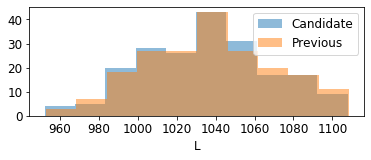

    p = 0.9877895282790693
    --x Cannot reject null hypothesis.

Could not improve beyond scale 5. Optimization ends.


In [3]:
#Run maximum likelihood optimization
optim_instance = scale_by_scale_optim.ScalesOptim(labels, 
                                                  stop_locations,
                                                  bootstrap = True,
                                                  min_dist=1.2, 
                                                  siglvl=0.4)
final_series, _, likelihoods, _, final_sizes, _, _ = optim_instance.find_best_scale()

# Visualize results

In [4]:
import numpy as np
utils.plot_solution_on_world_map(np.array(final_series), stop_locations)

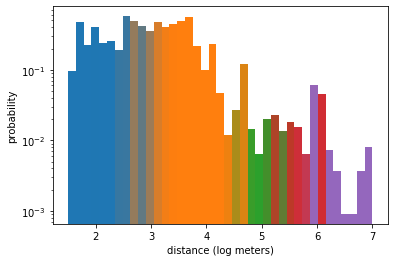

In [5]:
plt.figure()
utils.plot_scales_histogram(final_series, stop_locations)
plt.xlabel('distance (log meters)')
plt.ylabel('probability')
plt.show()

Text(0, 0.5, '-log L')

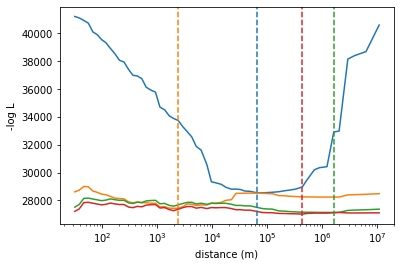

In [6]:
plt.figure()
for key, values in sorted(likelihoods.items(), key = lambda x:x[0]):
    x,y = zip(*values)
    plt.plot(x,y, color = 'C{}'.format(key-2))
for key, values in sorted(final_sizes.items(), key = lambda x:x[0]):
    plt.axvline(values, color = 'C{}'.format(key-2), ls = '--')
plt.xscale('log')
plt.xlabel('distance (m)')
plt.ylabel('-log L')

# Generate new data

In [7]:
from joblib import Parallel, delayed

In [8]:
#recover parameters
nested_dictionary, cell_p_change = generate.recover_parameters_from_fitted_trace(final_series)

new_trace = generate.generate_trace(nested_dictionary, cell_p_change, 1000, initial_position=final_series[-1])

In [9]:
#Generate 100 Synthetic traces
new_traces = Parallel(n_jobs=2)(delayed(generate.generate_trace)(nested_dictionary, cell_p_change, 1000, initial_position=final_series[-1]) for i in range(100))